## POSTTEST06
## Rausyanfikr Adi Karmayoga 
## 2009106020

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#### Dataset yang digunakan

In [47]:
df = pd.read_csv('data-credit-card.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   600 non-null    object 
 1   Gender               600 non-null    object 
 2   Age                  600 non-null    int64  
 3   Region_Code          600 non-null    object 
 4   Occupation           600 non-null    object 
 5   Channel_Code         600 non-null    object 
 6   Vintage              600 non-null    float64
 7   Credit_Product       600 non-null    object 
 8   Avg_Account_Balance  600 non-null    int64  
 9   Is_Active            600 non-null    object 
 10  Is_Lead              600 non-null    int64  
 11  CreditProduct_No     600 non-null    float64
 12  CreditProduct_Yes    600 non-null    float64
 13  IsActive_No          600 non-null    float64
 14  IsActive_Yes         600 non-null    float64
dtypes: float64(5), int64(3), object(7)
memor

#### Membuat objek dari k means dengan jumlah cluster = 3

In [48]:
model = KMeans(n_clusters=3)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_No,CreditProduct_Yes,IsActive_No,IsActive_Yes
0,NNVBBKZB,Female,73,RG268,Other,X3,43.0,No,1045696,No,0,1.0,0.0,1.0,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32.0,No,581988,No,0,1.0,0.0,1.0,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26.0,No,1484315,Yes,0,1.0,0.0,0.0,1.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19.0,No,470454,No,0,1.0,0.0,1.0,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33.0,No,886787,No,0,1.0,0.0,1.0,0.0


#### Memilih atribut yang ingin dilatih dan melakukan fit pada model

In [49]:
data_cluster = df[["Vintage","Age"]]
model.fit(data_cluster)

KMeans(n_clusters=3)

#### Menentukan label untuk cluster

In [50]:
labels = model.labels_
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2,

#### Membuat label dataframe dan atribut Is_Active sebagai kolom buat crosstab: ct

In [51]:
dfKmeans = pd.DataFrame({'labels': labels, 'Is_Active': df.Is_Active})
ct = pd.crosstab(dfKmeans["labels"], dfKmeans["Is_Active"])
ct

Is_Active,No,Yes
labels,,
0,59,60
1,246,109
2,65,61


#### Mengambil baris pada kolom tertentu dalam bentuk array

In [52]:
x = data_cluster.iloc[:,0]
y = data_cluster.iloc[:,1]

#### Menampung koordinat dari tiap centroid

In [53]:
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

#### Visualisasi cluster

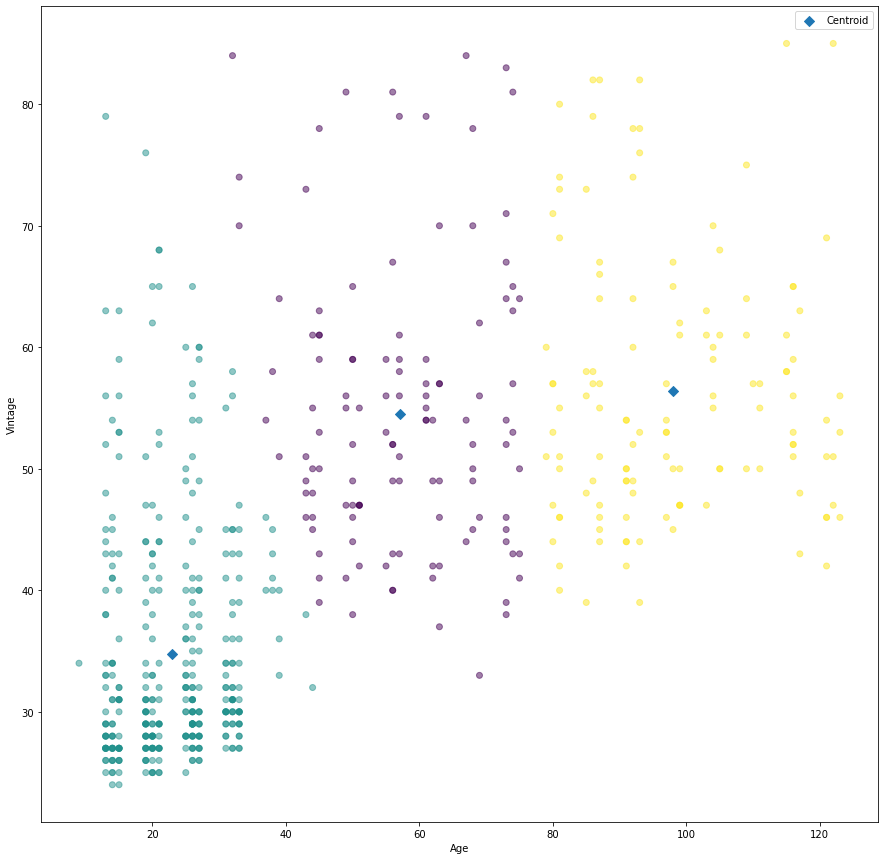

In [54]:
plt.figure(figsize=(15,15))
plt.scatter(x,y,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("Age")
plt.ylabel("Vintage")
plt.legend()
plt.show()